In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

In [3]:
pip install matplotlib

In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install minisom

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import pandas as pd
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for geospatial
import folium
import geopy
## for machine learning
import sklearn
from sklearn import preprocessing, cluster
import scipy
## for deep learning
import minisom

In [12]:
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim 
import requests
CLIENT_ID = "KTCJJ2YZ2143QHEZ2JAQS4FJIO5DLSDO0YN4YBXPMI5NKTEF" # your Foursquare ID
CLIENT_SECRET = "KNG2LO22BPLHN1E3OAHWLYQ5PQBN14XYZMEMAS0CPJEJKOTR" # your Foursquare Secret
VERSION = '20200316'
LIMIT = 10000

In [13]:
city = "Hyderabad"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
latpoint=location.latitude
longpoint=location.longitude
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)
print(latpoint,longpoint)

Hyderabad, Bahadurpura mandal, Hyderabad, Telangana, India
[lat, long]: [17.360589, 78.4740613]
17.360589 78.4740613


In [14]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latpoint, longpoint,
    30000, 
    LIMIT)

results = requests.get(url).json()

In [15]:
results

{'meta': {'code': 200, 'requestId': '63b8c0c4b250594c214c61cd'},
 'response': {'queryRefinements': {'target': {'type': 'path',
    'url': '/venue/explore',
    'params': {'ll': '17.360589,78.474061', 'radius': '30000'}},
   'refinements': [{'query': 'Food'},
    {'query': 'Nightlife'},
    {'query': 'Coffee'},
    {'query': 'Shops'},
    {'query': 'Arts'},
    {'query': 'Outdoors'}]},
  'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Hyderabad',
  'headerFullLocation': 'Hyderabad',
  'headerLocationGranularity': 'city',
  'totalResults': 130,
  'suggestedBounds': {'ne': {'lat': 17.63058927000027,
    'lng': 78.75642007724154},
   'sw': {'lat': 17.09058872999973, 'lng': 78.19170252275846}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInt

In [16]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)

C:\Users\mukal\AppData\Local\Temp\ipykernel_44660\2768318480.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venues = json_normalize(venues)


In [17]:
venues

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4cc19bfb67a3b1f77a8dc90e',
   'name': 'Chowmahala Palace',
   'location': {'address': 'Moti Gali, Charminar',
    'lat': 17.359299743829105,
    'lng': 78.47161740649624,
    'labeledLatLngs': [{'label': 'display',
      'lat': 17.359299743829105,
      'lng': 78.47161740649624}],
    'distance': 296,
    'cc': 'IN',
    'city': 'Hyderabad',
    'state': 'Telangana',
    'country': 'India',
    'formattedAddress': ['Moti Gali, Charminar',
     'Hyderabad',
     'Telangana',
     'India']},
   'categories': [{'id': '4bf58dd8d48988d190941735',
     'name': 'History Museum',
     'pluralName': 'History Museums',
     'shortName': 'History Museum',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/museum_history_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'gro

In [18]:
nearby_venues

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.location.postalCode,venue.venuePage.id,venue.location.neighborhood
0,e-0-4cc19bfb67a3b1f77a8dc90e-0,0,"[{'summary': 'This spot is popular', 'type': '...",4cc19bfb67a3b1f77a8dc90e,Chowmahala Palace,"Moti Gali, Charminar",17.359300,78.471617,"[{'label': 'display', 'lat': 17.35929974382910...",296,...,Telangana,India,"[Moti Gali, Charminar, Hyderabad, Telangana, I...","[{'id': '4bf58dd8d48988d190941735', 'name': 'H...",0,[],NaN,NaN,NaN,NaN
1,e-0-4c642d01eb82d13a1fa809d6-1,0,"[{'summary': 'This spot is popular', 'type': '...",4c642d01eb82d13a1fa809d6,Shadaab,NaN,17.368661,78.475572,"[{'label': 'display', 'lat': 17.36866111971218...",912,...,Telangana,India,"[Hyderabad, Telangana, India]","[{'id': '4bf58dd8d48988d147941735', 'name': 'D...",0,[],NaN,NaN,NaN,NaN
2,e-0-4e42c77445ddae899d09cb15-2,0,"[{'summary': 'This spot is popular', 'type': '...",4e42c77445ddae899d09cb15,Hotel Shah Ghouse,Shahalibanda,17.347899,78.470986,"[{'label': 'display', 'lat': 17.34789912587468...",1449,...,Telangana,India,"[Shahalibanda (Old City), Hyderabad, Telangana...","[{'id': '4bf58dd8d48988d1c7941735', 'name': 'S...",0,[],Old City,NaN,NaN,NaN
3,e-0-4d0103874f56b60cf6f6a437-3,0,"[{'summary': 'This spot is popular', 'type': '...",4d0103874f56b60cf6f6a437,Taj Falaknuma Palace,"Engine Bowli, Falaknuma",17.330118,78.467460,"[{'label': 'display', 'lat': 17.33011795505642...",3463,...,Telangana,India,"[Engine Bowli, Falaknuma, Hyderabad, Telangana...","[{'id': '4bf58dd8d48988d12f951735', 'name': 'R...",0,[],NaN,NaN,NaN,NaN
4,e-0-4da53ba4fa8cf9bcc87a5c2c-4,0,"[{'summary': 'This spot is popular', 'type': '...",4da53ba4fa8cf9bcc87a5c2c,Laxman Ki Bandi,NaN,17.378895,78.463973,"[{'label': 'display', 'lat': 17.37889458842897...",2302,...,Telangana,India,"[Hyderabad, Telangana, India]","[{'id': '54135bf5e4b08f3d2429dfde', 'name': 'S...",0,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-4e58e6beae6099fc00bf8058-95,0,"[{'summary': 'This spot is popular', 'type': '...",4e58e6beae6099fc00bf8058,Ramoji Film City,NaN,17.309839,78.681879,"[{'label': 'display', 'lat': 17.30983890015597...",22794,...,Andhra Pradesh,India,"[Pochampalle, Andhra Pradesh, India]","[{'id': '4bf58dd8d48988d1f1931735', 'name': 'G...",0,[],NaN,NaN,NaN,NaN
96,e-0-4d73bb51d976236ab86c1879-96,0,"[{'summary': 'This spot is popular', 'type': '...",4d73bb51d976236ab86c1879,Meco MotorSport - Go Karting,Rajiv Gandhi International Airport,17.239713,78.427797,"[{'label': 'display', 'lat': 17.2397133353023,...",14326,...,Telangana,India,"[Rajiv Gandhi International Airport, Hyderabad...","[{'id': '4bf58dd8d48988d1f4931735', 'name': 'R...",0,[],NaN,NaN,NaN,NaN
97,e-0-4e4514281495455b10d4ec60-97,0,"[{'summary': 'This spot is popular', 'type': '...",4e4514281495455b10d4ec60,Sitara Hotel,Ramoji Film City,17.260212,78.678729,"[{'label': 'display', 'lat': 17.26021217265053...",24453,...,Telangana,India,"[Ramoji Film City, Hyderabad, Telangana, India]","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],NaN,NaN,NaN,NaN
98,e-0-4b648c3bf964a5209ebc2ae3-98,0,"[{'summary': 'This spot is popular', 'type': '...",4b648c3bf964a5209ebc2ae3,Rajiv Gandhi International Airport (HYD) (Raji...,Shamshabad,17.236234,78.429710,NaN,14623,...,Telangana,India,"[Shamshabad, Hyderabad 500409, Telangana, India]","[{'id': '4bf58dd8d48988d1ed931735', 'name': 'A...",0,[],NaN,500409,NaN,NaN


In [41]:
resta=[]
gym=[]
shops=[]
oth=[]
for lat,long in zip(nearby_venues['venue.location.lat'],nearby_venues['venue.location.lng']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
      CLIENT_ID, 
      CLIENT_SECRET, 
      VERSION, 
      lat,long,
      1000, 
      100)
    res = requests.get(url).json()
    venue = res['response']['groups'][0]['items']
    nearby_venue = json_normalize(venue)
    df=nearby_venue['venue.categories']

    r=[]
    g=[]
    s=[]
    for i in range(0,df.size):
      r.append(df[i][0]['icon']['prefix'].find('food'))
      g.append(df[i][0]['icon']['prefix'].find('travel'))
      s.append(df[i][0]['icon']['prefix'].find('shops'))
    re=0
    gy=1
    sh=1
    for i in r:
      if i>1:
        re+=1
    resta.append(re)
    for i in g:
      if i>1:
        gy+=1
    gym.append(gy)
    for i in s:
      if i>1:
        sh=sh+1
    shops.append(sh)
    oth.append(df.size-(len(r)+len(g)+len(s)))

print(len(resta))
print(len(gym))
print(len(shops))

nearby_venues['restaurant']=resta
nearby_venues['Gyms']=gym
nearby_venues['Groceries']=shops
nearby_venues['others']=oth
nearby_venues
    

C:\Users\mukal\AppData\Local\Temp\ipykernel_44660\1104674774.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venue = json_normalize(venue)
C:\Users\mukal\AppData\Local\Temp\ipykernel_44660\1104674774.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venue = json_normalize(venue)
C:\Users\mukal\AppData\Local\Temp\ipykernel_44660\1104674774.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venue = json_normalize(venue)
C:\Users\mukal\AppData\Local\Temp\ipykernel_44660\1104674774.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venue = json_normalize(venue)
C:\Users\mukal\AppData\Local\Temp\ipykernel_44660\1104674774.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venue = json_normali

100
100
100


C:\Users\mukal\AppData\Local\Temp\ipykernel_44660\1104674774.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venue = json_normalize(venue)


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.location.postalCode,venue.venuePage.id,venue.location.neighborhood,restaurant,others,Gyms,Groceries
0,e-0-4cc19bfb67a3b1f77a8dc90e-0,0,"[{'summary': 'This spot is popular', 'type': '...",4cc19bfb67a3b1f77a8dc90e,Chowmahala Palace,"Moti Gali, Charminar",17.359300,78.471617,"[{'label': 'display', 'lat': 17.35929974382910...",296,...,0,[],NaN,NaN,NaN,NaN,5,-14,1,2
1,e-0-4c642d01eb82d13a1fa809d6-1,0,"[{'summary': 'This spot is popular', 'type': '...",4c642d01eb82d13a1fa809d6,Shadaab,NaN,17.368661,78.475572,"[{'label': 'display', 'lat': 17.36866111971218...",912,...,0,[],NaN,NaN,NaN,NaN,6,-20,1,2
2,e-0-4e42c77445ddae899d09cb15-2,0,"[{'summary': 'This spot is popular', 'type': '...",4e42c77445ddae899d09cb15,Hotel Shah Ghouse,Shahalibanda,17.347899,78.470986,"[{'label': 'display', 'lat': 17.34789912587468...",1449,...,0,[],Old City,NaN,NaN,NaN,2,-8,1,3
3,e-0-4d0103874f56b60cf6f6a437-3,0,"[{'summary': 'This spot is popular', 'type': '...",4d0103874f56b60cf6f6a437,Taj Falaknuma Palace,"Engine Bowli, Falaknuma",17.330118,78.467460,"[{'label': 'display', 'lat': 17.33011795505642...",3463,...,0,[],NaN,NaN,NaN,NaN,3,-10,3,1
4,e-0-4da53ba4fa8cf9bcc87a5c2c-4,0,"[{'summary': 'This spot is popular', 'type': '...",4da53ba4fa8cf9bcc87a5c2c,Laxman Ki Bandi,NaN,17.378895,78.463973,"[{'label': 'display', 'lat': 17.37889458842897...",2302,...,0,[],NaN,NaN,NaN,NaN,2,-8,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-4e58e6beae6099fc00bf8058-95,0,"[{'summary': 'This spot is popular', 'type': '...",4e58e6beae6099fc00bf8058,Ramoji Film City,NaN,17.309839,78.681879,"[{'label': 'display', 'lat': 17.30983890015597...",22794,...,0,[],NaN,NaN,NaN,NaN,2,-6,1,1
96,e-0-4d73bb51d976236ab86c1879-96,0,"[{'summary': 'This spot is popular', 'type': '...",4d73bb51d976236ab86c1879,Meco MotorSport - Go Karting,Rajiv Gandhi International Airport,17.239713,78.427797,"[{'label': 'display', 'lat': 17.2397133353023,...",14326,...,0,[],NaN,NaN,NaN,NaN,14,-64,8,10
97,e-0-4e4514281495455b10d4ec60-97,0,"[{'summary': 'This spot is popular', 'type': '...",4e4514281495455b10d4ec60,Sitara Hotel,Ramoji Film City,17.260212,78.678729,"[{'label': 'display', 'lat': 17.26021217265053...",24453,...,0,[],NaN,NaN,NaN,NaN,3,-20,3,3
98,e-0-4b648c3bf964a5209ebc2ae3-98,0,"[{'summary': 'This spot is popular', 'type': '...",4b648c3bf964a5209ebc2ae3,Rajiv Gandhi International Airport (HYD) (Raji...,Shamshabad,17.236234,78.429710,NaN,14623,...,0,[],NaN,500409,NaN,NaN,16,-58,6,7


In [36]:
df.size

4

In [42]:
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.lat',
       'venue.location.lng', 'venue.location.labeledLatLngs',
       'venue.location.distance', 'venue.location.cc', 'venue.location.city',
       'venue.location.state', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.photos.count', 'venue.photos.groups',
       'venue.location.crossStreet', 'venue.location.postalCode',
       'venue.venuePage.id', 'venue.location.neighborhood', 'restaurant',
       'others', 'Gyms', 'Groceries'],
      dtype='object')

In [21]:
n=nearby_venues.drop(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.cc', 
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.crossStreet', 'venue.location.address','venue.location.city',
       'venue.location.state', 'venue.location.crossStreet',
       'venue.location.neighborhood',	'venue.venuePage.id',
       'venue.location.postalCode','venue.location.country'],axis=1)

In [22]:
n

,venue.location.lat,venue.location.lng,venue.location.formattedAddress
0,17.359300,78.471617,"[Moti Gali, Charminar, Hyderabad, Telangana, I..."
1,17.368661,78.475572,"[Hyderabad, Telangana, India]"
2,17.347899,78.470986,"[Shahalibanda (Old City), Hyderabad, Telangana..."
3,17.330118,78.467460,"[Engine Bowli, Falaknuma, Hyderabad, Telangana..."
4,17.378895,78.463973,"[Hyderabad, Telangana, India]"
...,...,...,...
95,17.309839,78.681879,"[Pochampalle, Andhra Pradesh, India]"
96,17.239713,78.427797,"[Rajiv Gandhi International Airport, Hyderabad..."
97,17.260212,78.678729,"[Ramoji Film City, Hyderabad, Telangana, India]"
98,17.236234,78.429710,"[Shamshabad, Hyderabad 500409, Telangana, India]"


In [23]:
for i in df :
    print(i)

[{'id': '4bf58dd8d48988d1c9941735', 'name': 'Ice Cream Shop', 'pluralName': 'Ice Cream Shops', 'shortName': 'Ice Cream', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/icecream_', 'suffix': '.png'}, 'primary': True}]
[{'id': '4bf58dd8d48988d1f8941735', 'name': 'Furniture / Home Store', 'pluralName': 'Furniture / Home Stores', 'shortName': 'Furniture / Home', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/furniture_', 'suffix': '.png'}, 'primary': True}]
[{'id': '4bf58dd8d48988d18a941735', 'name': 'Cricket Ground', 'pluralName': 'Cricket Grounds', 'shortName': 'Cricket', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/stadium_cricket_', 'suffix': '.png'}, 'primary': True}]
[{'id': '56aa371be4b08b9a8d573550', 'name': 'Food Service', 'pluralName': 'Food Services', 'shortName': 'Food Service', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/foodanddrink_', 'suffix': '.png'}, 'primary': True}]


In [29]:
for i in range(0,df.size):
    print(df[i][0]['icon']['prefix'])

https://ss3.4sqi.net/img/categories_v2/food/icecream_
https://ss3.4sqi.net/img/categories_v2/shops/furniture_
https://ss3.4sqi.net/img/categories_v2/arts_entertainment/stadium_cricket_
https://ss3.4sqi.net/img/categories_v2/shops/foodanddrink_


NameError: name 'g' is not defined

In [ ]:
lat=nearby_venues['venue.location.lat']
long=nearby_venues['venue.location.lng']

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.lat',
       'venue.location.lng', 'venue.location.labeledLatLngs',
       'venue.location.distance', 'venue.location.cc', 'venue.location.city',
       'venue.location.state', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.photos.count', 'venue.photos.groups',
       'venue.location.crossStreet', 'venue.location.postalCode',
       'venue.venuePage.id', 'venue.location.neighborhood', 'restaurant',
       'others', 'shop'],
      dtype='object')

In [ ]:
n.columns

Index(['venue.location.lat', 'venue.location.lng',
       'venue.location.formattedAddress', 'restaurant', 'others', 'shop'],
      dtype='object')

In [ ]:
n

,venue.location.lat,venue.location.lng,venue.location.formattedAddress,restaurant,others,shop
0,17.359300,78.471617,"[Moti Gali, Charminar, Hyderabad, Telangana, I...",6,2,1
1,17.368661,78.475572,"[Hyderabad, Telangana, India]",6,5,3
2,17.330118,78.467460,"[Engine Bowli, Falaknuma, Hyderabad, Telangana...",3,2,0
3,17.347899,78.470986,"[Shahalibanda (Old City), Hyderabad, Telangana...",6,4,4
4,17.388088,78.481134,"[Kandaswamy Lane, Sultan Bazaar, Koti Andhra P...",18,12,6
...,...,...,...,...,...,...
95,17.260212,78.678729,"[Ramoji Film City, Hyderabad, Telangana, India]",3,7,2
96,17.487137,78.390953,"[KPHB Rd, KPHB Phase III, Kukatpally Housing B...",19,5,4
97,17.236234,78.429710,"[Shamshabad, Hyderabad 500409, Telangana, India]",17,12,6
98,17.282320,78.587299,[India],3,2,2


,lat,long,venue.location.formattedAddress,restaurant,others,shop
0,17.359300,78.471617,"[Moti Gali, Charminar, Hyderabad, Telangana, I...",6,2,1
1,17.368661,78.475572,"[Hyderabad, Telangana, India]",6,5,3
2,17.330118,78.467460,"[Engine Bowli, Falaknuma, Hyderabad, Telangana...",3,2,0
3,17.347899,78.470986,"[Shahalibanda (Old City), Hyderabad, Telangana...",6,4,4
4,17.388088,78.481134,"[Kandaswamy Lane, Sultan Bazaar, Koti Andhra P...",18,12,6
...,...,...,...,...,...,...
95,17.260212,78.678729,"[Ramoji Film City, Hyderabad, Telangana, India]",3,7,2
96,17.487137,78.390953,"[KPHB Rd, KPHB Phase III, Kukatpally Housing B...",19,5,4
97,17.236234,78.429710,"[Shamshabad, Hyderabad 500409, Telangana, India]",17,12,6
98,17.282320,78.587299,[India],3,2,2


C:\Users\mukal\AppData\Local\Temp\ipykernel_18040\3350752478.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  n['venue.location.formattedAddress'] = n['venue.location.formattedAddress'].astype(str).str.replace(char, ' ')


In [ ]:
n

,lat,long,venue.location.formattedAddress,restaurant,others,shop
0,17.359300,78.471617,"'Moti Gali, Charminar', 'Hyderabad', 'Telanga...",6,2,1
1,17.368661,78.475572,"'Hyderabad', 'Telangana', 'India'",6,5,3
2,17.330118,78.467460,"'Engine Bowli, Falaknuma', 'Hyderabad', 'Tela...",3,2,0
3,17.347899,78.470986,"'Shahalibanda (Old City)', 'Hyderabad', 'Tela...",6,4,4
4,17.388088,78.481134,"'Kandaswamy Lane, Sultan Bazaar, Koti Andhra ...",18,12,6
...,...,...,...,...,...,...
95,17.260212,78.678729,"'Ramoji Film City', 'Hyderabad', 'Telangana',...",3,7,2
96,17.487137,78.390953,"'KPHB Rd, KPHB Phase III, Kukatpally Housing ...",19,5,4
97,17.236234,78.429710,"'Shamshabad', 'Hyderabad 500409', 'Telangana'...",17,12,6
98,17.282320,78.587299,'India',3,2,2


In [ ]:
k = 6
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = n[["lat","long"]]
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)
## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:
    dtf_X["centroids"].iloc[i] = 1
## add clustering info to the original dataset
n[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]
n

c:\Users\mukal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mukal\AppData\Local\Temp\ipykernel_18040\910861213.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf_X["centroids"].iloc[i] = 1


,lat,long,venue.location.formattedAddress,restaurant,others,shop,cluster,centroids
0,17.359300,78.471617,"'Moti Gali, Charminar', 'Hyderabad', 'Telanga...",6,2,1,5,0
1,17.368661,78.475572,"'Hyderabad', 'Telangana', 'India'",6,5,3,5,0
2,17.330118,78.467460,"'Engine Bowli, Falaknuma', 'Hyderabad', 'Tela...",3,2,0,5,0
3,17.347899,78.470986,"'Shahalibanda (Old City)', 'Hyderabad', 'Tela...",6,4,4,5,1
4,17.388088,78.481134,"'Kandaswamy Lane, Sultan Bazaar, Koti Andhra ...",18,12,6,3,0
...,...,...,...,...,...,...,...,...
95,17.260212,78.678729,"'Ramoji Film City', 'Hyderabad', 'Telangana',...",3,7,2,2,1
96,17.487137,78.390953,"'KPHB Rd, KPHB Phase III, Kukatpally Housing ...",19,5,4,4,0
97,17.236234,78.429710,"'Shamshabad', 'Hyderabad 500409', 'Telangana'...",17,12,6,1,0
98,17.282320,78.587299,'India',3,2,2,2,0


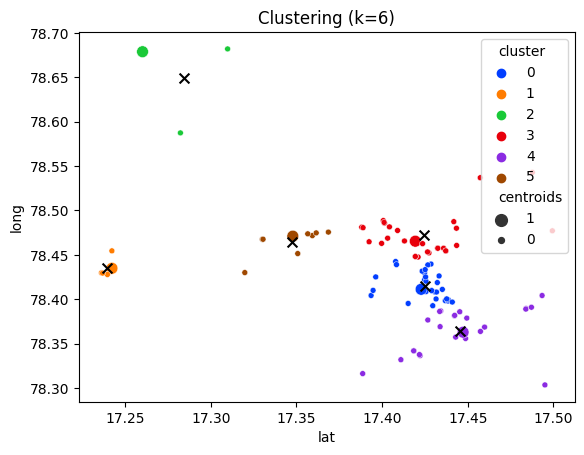

In [ ]:
## plot
fig, ax = plt.subplots()
sns.scatterplot(x="lat", y="long", data=n, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', 
           marker="x")

In [ ]:
x, y = "lat", "long"
color = "cluster"
size = "restaurant"
popup = "venue.location.formattedAddress"
marker = "centroids"
data = n.copy()
## create color column
lst_elements = sorted(list(n[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], 
           color=row["color"], fill=True,popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """ """+color+""":"""
for i in lst_elements:
     legend_html = legend_html+""" 
      """+str(i)+""""""
legend_html = legend_html+""""""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(n[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           draggable=False,  popup=row[popup] ,       
           icon=folium.Icon(color="black")).add_to(map_), axis=1)
## plot the map
map_